In [1]:
%matplotlib inline
from datetime import datetime
from datetime import date
from datetime import timedelta
from matplotlib import style
from pandas.plotting import table
from sqlalchemy import create_engine, inspect, func, desc
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Reflect Tables into SQLAlchemy ORM

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
# Display the row's columns and data in dictionary format
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fca488fb9b0>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [8]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fca488fbe48>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [9]:
# measurement has
#    prcp
#    station [e.g. USC00519397]
#    tobs (which I think stands for "temperature observed")
#    date [2010-01-01 to 2017-08-23 for two stations--same for all?]
#    id  [1 to 19550]
# Printing Useful for Debugging (PUfD)
measurement_list = session.query(Measurement)
for measurement in measurement_list:
    print(measurement.prcp, measurement.station, measurement.tobs, measurement.date, measurement.id)

0.08 USC00519397 65.0 2010-01-01 1
0.0 USC00519397 63.0 2010-01-02 2
0.0 USC00519397 74.0 2010-01-03 3
0.0 USC00519397 76.0 2010-01-04 4
None USC00519397 73.0 2010-01-06 5
0.06 USC00519397 70.0 2010-01-07 6
0.0 USC00519397 64.0 2010-01-08 7
0.0 USC00519397 68.0 2010-01-09 8
0.0 USC00519397 73.0 2010-01-10 9
0.01 USC00519397 64.0 2010-01-11 10
0.0 USC00519397 61.0 2010-01-12 11
0.0 USC00519397 66.0 2010-01-14 12
0.0 USC00519397 65.0 2010-01-15 13
0.0 USC00519397 68.0 2010-01-16 14
0.0 USC00519397 64.0 2010-01-17 15
0.0 USC00519397 72.0 2010-01-18 16
0.0 USC00519397 66.0 2010-01-19 17
0.0 USC00519397 66.0 2010-01-20 18
0.0 USC00519397 69.0 2010-01-21 19
0.0 USC00519397 67.0 2010-01-22 20
0.0 USC00519397 67.0 2010-01-23 21
0.01 USC00519397 71.0 2010-01-24 22
0.0 USC00519397 67.0 2010-01-25 23
0.04 USC00519397 76.0 2010-01-26 24
0.12 USC00519397 68.0 2010-01-27 25
0.0 USC00519397 72.0 2010-01-28 26
None USC00519397 70.0 2010-01-30 27
0.03 USC00519397 67.0 2010-01-31 28
0.01 USC00519397 66.

0.0 USC00519397 74.0 2011-03-03 387
0.88 USC00519397 72.0 2011-03-04 388
0.4 USC00519397 69.0 2011-03-05 389
0.03 USC00519397 70.0 2011-03-06 390
None USC00519397 72.0 2011-03-08 391
0.2 USC00519397 71.0 2011-03-09 392
0.15 USC00519397 71.0 2011-03-10 393
0.0 USC00519397 72.0 2011-03-12 394
0.0 USC00519397 70.0 2011-03-13 395
0.0 USC00519397 71.0 2011-03-14 396
0.0 USC00519397 76.0 2011-03-16 397
0.01 USC00519397 73.0 2011-03-17 398
0.05 USC00519397 74.0 2011-03-18 399
0.01 USC00519397 74.0 2011-03-19 400
0.02 USC00519397 74.0 2011-03-20 401
0.0 USC00519397 74.0 2011-03-21 402
0.02 USC00519397 74.0 2011-03-22 403
0.0 USC00519397 74.0 2011-03-23 404
0.06 USC00519397 73.0 2011-03-24 405
0.0 USC00519397 74.0 2011-03-25 406
0.0 USC00519397 74.0 2011-03-26 407
0.0 USC00519397 73.0 2011-03-27 408
0.04 USC00519397 74.0 2011-03-28 409
0.0 USC00519397 75.0 2011-03-30 410
0.0 USC00519397 74.0 2011-03-31 411
0.05 USC00519397 74.0 2011-04-01 412
0.04 USC00519397 75.0 2011-04-02 413
0.0 USC00519397

0.06 USC00519397 73.0 2012-03-01 732
0.0 USC00519397 67.0 2012-03-02 733
0.03 USC00519397 71.0 2012-03-03 734
0.01 USC00519397 72.0 2012-03-04 735
1.08 USC00519397 67.0 2012-03-05 736
4.0 USC00519397 69.0 2012-03-06 737
2.42 USC00519397 67.0 2012-03-07 738
0.02 USC00519397 69.0 2012-03-08 739
0.19 USC00519397 66.0 2012-03-09 740
0.06 USC00519397 73.0 2012-03-10 741
0.0 USC00519397 74.0 2012-03-11 742
0.03 USC00519397 71.0 2012-03-12 743
0.0 USC00519397 72.0 2012-03-13 744
0.0 USC00519397 73.0 2012-03-14 745
0.0 USC00519397 71.0 2012-03-15 746
0.05 USC00519397 72.0 2012-03-16 747
0.0 USC00519397 73.0 2012-03-17 748
0.0 USC00519397 72.0 2012-03-18 749
0.0 USC00519397 73.0 2012-03-19 750
0.0 USC00519397 69.0 2012-03-20 751
0.0 USC00519397 73.0 2012-03-21 752
0.03 USC00519397 74.0 2012-03-22 753
0.01 USC00519397 72.0 2012-03-23 754
0.0 USC00519397 74.0 2012-03-24 755
0.0 USC00519397 74.0 2012-03-25 756
0.11 USC00519397 72.0 2012-03-26 757
0.03 USC00519397 70.0 2012-03-27 758
0.02 USC005193

0.09 USC00519397 71.0 2013-02-20 1087
0.07 USC00519397 71.0 2013-02-21 1088
0.31 USC00519397 72.0 2013-02-22 1089
0.15 USC00519397 71.0 2013-02-23 1090
0.04 USC00519397 71.0 2013-02-24 1091
0.0 USC00519397 71.0 2013-02-25 1092
0.01 USC00519397 71.0 2013-02-26 1093
0.03 USC00519397 71.0 2013-02-27 1094
0.0 USC00519397 72.0 2013-02-28 1095
0.0 USC00519397 71.0 2013-03-01 1096
0.0 USC00519397 72.0 2013-03-02 1097
0.0 USC00519397 72.0 2013-03-03 1098
0.0 USC00519397 70.0 2013-03-04 1099
0.0 USC00519397 71.0 2013-03-05 1100
0.0 USC00519397 71.0 2013-03-06 1101
0.0 USC00519397 65.0 2013-03-07 1102
0.0 USC00519397 64.0 2013-03-08 1103
0.02 USC00519397 73.0 2013-03-09 1104
1.29 USC00519397 68.0 2013-03-10 1105
0.8 USC00519397 63.0 2013-03-11 1106
0.01 USC00519397 66.0 2013-03-12 1107
0.0 USC00519397 63.0 2013-03-13 1108
0.0 USC00519397 66.0 2013-03-14 1109
0.0 USC00519397 64.0 2013-03-15 1110
0.0 USC00519397 69.0 2013-03-16 1111
0.0 USC00519397 62.0 2013-03-17 1112
0.0 USC00519397 64.0 2013-03

0.0 USC00519397 75.0 2014-03-27 1487
0.0 USC00519397 71.0 2014-03-28 1488
0.0 USC00519397 73.0 2014-03-29 1489
0.0 USC00519397 73.0 2014-03-30 1490
0.02 USC00519397 75.0 2014-03-31 1491
0.16 USC00519397 73.0 2014-04-01 1492
0.02 USC00519397 76.0 2014-04-02 1493
0.16 USC00519397 76.0 2014-04-03 1494
0.0 USC00519397 75.0 2014-04-04 1495
0.0 USC00519397 71.0 2014-04-05 1496
0.0 USC00519397 69.0 2014-04-06 1497
0.01 USC00519397 71.0 2014-04-07 1498
0.0 USC00519397 71.0 2014-04-08 1499
0.0 USC00519397 73.0 2014-04-09 1500
0.0 USC00519397 72.0 2014-04-10 1501
0.0 USC00519397 75.0 2014-04-11 1502
0.01 USC00519397 69.0 2014-04-12 1503
0.04 USC00519397 73.0 2014-04-13 1504
0.08 USC00519397 74.0 2014-04-14 1505
0.0 USC00519397 75.0 2014-04-15 1506
0.05 USC00519397 74.0 2014-04-16 1507
0.0 USC00519397 76.0 2014-04-17 1508
0.02 USC00519397 76.0 2014-04-18 1509
0.01 USC00519397 76.0 2014-04-19 1510
0.0 USC00519397 74.0 2014-04-20 1511
0.06 USC00519397 73.0 2014-04-21 1512
0.05 USC00519397 76.0 2014

0.0 USC00519397 76.0 2015-05-04 1887
0.05 USC00519397 77.0 2015-05-05 1888
0.03 USC00519397 75.0 2015-05-06 1889
0.01 USC00519397 77.0 2015-05-07 1890
0.18 USC00519397 73.0 2015-05-08 1891
0.05 USC00519397 76.0 2015-05-09 1892
0.0 USC00519397 76.0 2015-05-10 1893
0.0 USC00519397 76.0 2015-05-11 1894
0.01 USC00519397 74.0 2015-05-12 1895
0.0 USC00519397 76.0 2015-05-13 1896
0.0 USC00519397 76.0 2015-05-14 1897
0.13 USC00519397 74.0 2015-05-15 1898
0.0 USC00519397 76.0 2015-05-16 1899
0.0 USC00519397 77.0 2015-05-17 1900
0.0 USC00519397 77.0 2015-05-18 1901
0.0 USC00519397 76.0 2015-05-19 1902
0.0 USC00519397 76.0 2015-05-20 1903
0.0 USC00519397 77.0 2015-05-21 1904
0.0 USC00519397 75.0 2015-05-22 1905
0.07 USC00519397 75.0 2015-05-23 1906
0.0 USC00519397 73.0 2015-05-24 1907
0.0 USC00519397 74.0 2015-05-25 1908
0.0 USC00519397 75.0 2015-05-26 1909
0.0 USC00519397 76.0 2015-05-27 1910
0.0 USC00519397 77.0 2015-05-28 1911
0.0 USC00519397 78.0 2015-05-29 1912
0.0 USC00519397 78.0 2015-05-3

0.01 USC00519397 77.0 2016-06-07 2287
0.0 USC00519397 77.0 2016-06-08 2288
0.01 USC00519397 73.0 2016-06-09 2289
0.05 USC00519397 77.0 2016-06-10 2290
0.0 USC00519397 78.0 2016-06-11 2291
0.01 USC00519397 78.0 2016-06-12 2292
0.0 USC00519397 80.0 2016-06-13 2293
0.0 USC00519397 79.0 2016-06-14 2294
0.01 USC00519397 78.0 2016-06-15 2295
0.02 USC00519397 77.0 2016-06-16 2296
0.02 USC00519397 76.0 2016-06-17 2297
0.0 USC00519397 77.0 2016-06-18 2298
0.01 USC00519397 77.0 2016-06-19 2299
0.01 USC00519397 78.0 2016-06-20 2300
0.0 USC00519397 80.0 2016-06-21 2301
0.0 USC00519397 79.0 2016-06-22 2302
0.0 USC00519397 79.0 2016-06-23 2303
0.01 USC00519397 77.0 2016-06-24 2304
0.03 USC00519397 78.0 2016-06-25 2305
0.01 USC00519397 79.0 2016-06-26 2306
0.01 USC00519397 80.0 2016-06-27 2307
0.0 USC00519397 76.0 2016-06-28 2308
0.0 USC00519397 79.0 2016-06-29 2309
0.0 USC00519397 80.0 2016-06-30 2310
0.0 USC00519397 79.0 2016-07-01 2311
0.0 USC00519397 79.0 2016-07-02 2312
0.0 USC00519397 77.0 2016

0.02 USC00519397 81.0 2017-07-14 2687
0.0 USC00519397 80.0 2017-07-15 2688
0.02 USC00519397 78.0 2017-07-16 2689
0.03 USC00519397 80.0 2017-07-17 2690
0.05 USC00519397 80.0 2017-07-18 2691
0.03 USC00519397 80.0 2017-07-20 2692
0.0 USC00519397 80.0 2017-07-21 2693
0.03 USC00519397 81.0 2017-07-22 2694
0.0 USC00519397 81.0 2017-07-23 2695
0.05 USC00519397 78.0 2017-07-24 2696
0.0 USC00519397 80.0 2017-07-25 2697
0.0 USC00519397 82.0 2017-07-26 2698
0.0 USC00519397 79.0 2017-07-27 2699
0.0 USC00519397 81.0 2017-07-28 2700
0.0 USC00519397 81.0 2017-07-29 2701
0.0 USC00519397 81.0 2017-07-30 2702
0.0 USC00519397 80.0 2017-07-31 2703
0.02 USC00519397 77.0 2017-08-01 2704
0.0 USC00519397 73.0 2017-08-02 2705
0.0 USC00519397 79.0 2017-08-03 2706
0.02 USC00519397 80.0 2017-08-04 2707
0.0 USC00519397 81.0 2017-08-05 2708
0.0 USC00519397 80.0 2017-08-06 2709
0.0 USC00519397 80.0 2017-08-07 2710
0.0 USC00519397 80.0 2017-08-08 2711
0.0 USC00519397 80.0 2017-08-09 2712
0.0 USC00519397 81.0 2017-08-

0.42 USC00513117 69.0 2011-01-01 3087
0.11 USC00513117 74.0 2011-01-02 3088
0.01 USC00513117 74.0 2011-01-03 3089
0.0 USC00513117 73.0 2011-01-04 3090
0.04 USC00513117 67.0 2011-01-05 3091
0.21 USC00513117 67.0 2011-01-06 3092
0.02 USC00513117 65.0 2011-01-07 3093
0.01 USC00513117 64.0 2011-01-08 3094
0.0 USC00513117 63.0 2011-01-09 3095
0.0 USC00513117 72.0 2011-01-10 3096
0.11 USC00513117 61.0 2011-01-11 3097
0.46 USC00513117 71.0 2011-01-12 3098
5.21 USC00513117 70.0 2011-01-13 3099
0.22 USC00513117 76.0 2011-01-14 3100
0.0 USC00513117 68.0 2011-01-15 3101
0.0 USC00513117 69.0 2011-01-16 3102
0.03 USC00513117 69.0 2011-01-17 3103
0.0 USC00513117 66.0 2011-01-18 3104
0.05 USC00513117 64.0 2011-01-19 3105
0.01 USC00513117 72.0 2011-01-20 3106
0.01 USC00513117 73.0 2011-01-21 3107
0.0 USC00513117 73.0 2011-01-22 3108
0.0 USC00513117 72.0 2011-01-23 3109
0.01 USC00513117 72.0 2011-01-24 3110
0.0 USC00513117 65.0 2011-01-25 3111
0.0 USC00513117 67.0 2011-01-26 3112
0.0 USC00513117 72.0 2

0.05 USC00513117 71.0 2012-02-22 3487
0.04 USC00513117 71.0 2012-02-23 3488
0.0 USC00513117 69.0 2012-02-24 3489
0.01 USC00513117 68.0 2012-02-25 3490
0.23 USC00513117 72.0 2012-02-26 3491
0.0 USC00513117 71.0 2012-02-27 3492
0.0 USC00513117 71.0 2012-02-28 3493
0.0 USC00513117 72.0 2012-02-29 3494
0.0 USC00513117 72.0 2012-03-01 3495
0.0 USC00513117 67.0 2012-03-02 3496
0.05 USC00513117 70.0 2012-03-03 3497
0.03 USC00513117 70.0 2012-03-04 3498
5.71 USC00513117 65.0 2012-03-05 3499
2.33 USC00513117 67.0 2012-03-06 3500
2.41 USC00513117 66.0 2012-03-07 3501
0.59 USC00513117 67.0 2012-03-08 3502
4.6 USC00513117 61.0 2012-03-09 3503
0.4 USC00513117 72.0 2012-03-10 3504
0.07 USC00513117 74.0 2012-03-11 3505
0.1 USC00513117 70.0 2012-03-12 3506
0.0 USC00513117 69.0 2012-03-13 3507
0.0 USC00513117 70.0 2012-03-14 3508
0.03 USC00513117 69.0 2012-03-15 3509
0.01 USC00513117 70.0 2012-03-16 3510
0.0 USC00513117 75.0 2012-03-17 3511
0.05 USC00513117 68.0 2012-03-18 3512
0.07 USC00513117 71.0 20

0.05 USC00513117 69.0 2013-03-30 3886
0.02 USC00513117 64.0 2013-03-31 3887
0.0 USC00513117 63.0 2013-04-01 3888
0.0 USC00513117 63.0 2013-04-02 3889
0.02 USC00513117 64.0 2013-04-03 3890
0.07 USC00513117 65.0 2013-04-04 3891
0.0 USC00513117 70.0 2013-04-05 3892
0.0 USC00513117 72.0 2013-04-06 3893
0.01 USC00513117 73.0 2013-04-07 3894
0.0 USC00513117 71.0 2013-04-08 3895
0.02 USC00513117 71.0 2013-04-09 3896
0.03 USC00513117 71.0 2013-04-10 3897
0.01 USC00513117 68.0 2013-04-11 3898
0.0 USC00513117 73.0 2013-04-12 3899
0.01 USC00513117 70.0 2013-04-13 3900
0.0 USC00513117 75.0 2013-04-14 3901
0.43 USC00513117 69.0 2013-04-15 3902
0.19 USC00513117 65.0 2013-04-16 3903
0.0 USC00513117 72.0 2013-04-17 3904
0.0 USC00513117 72.0 2013-04-18 3905
0.03 USC00513117 71.0 2013-04-19 3906
0.11 USC00513117 77.0 2013-04-20 3907
0.0 USC00513117 71.0 2013-04-21 3908
0.44 USC00513117 70.0 2013-04-22 3909
0.37 USC00513117 74.0 2013-04-23 3910
0.76 USC00513117 67.0 2013-04-24 3911
0.94 USC00513117 70.0 

0.02 USC00513117 71.0 2014-05-08 4286
0.13 USC00513117 70.0 2014-05-09 4287
0.09 USC00513117 73.0 2014-05-10 4288
0.17 USC00513117 76.0 2014-05-11 4289
0.48 USC00513117 73.0 2014-05-12 4290
0.13 USC00513117 71.0 2014-05-13 4291
0.0 USC00513117 69.0 2014-05-14 4292
0.0 USC00513117 73.0 2014-05-15 4293
0.55 USC00513117 70.0 2014-05-16 4294
0.12 USC00513117 75.0 2014-05-17 4295
0.2 USC00513117 79.0 2014-05-18 4296
0.0 USC00513117 69.0 2014-05-19 4297
0.05 USC00513117 72.0 2014-05-20 4298
0.0 USC00513117 74.0 2014-05-21 4299
0.0 USC00513117 74.0 2014-05-22 4300
0.15 USC00513117 73.0 2014-05-23 4301
0.01 USC00513117 74.0 2014-05-24 4302
0.86 USC00513117 75.0 2014-05-25 4303
0.28 USC00513117 75.0 2014-05-26 4304
0.08 USC00513117 74.0 2014-05-27 4305
0.14 USC00513117 76.0 2014-05-28 4306
0.02 USC00513117 74.0 2014-05-29 4307
0.05 USC00513117 74.0 2014-05-30 4308
0.01 USC00513117 77.0 2014-05-31 4309
0.0 USC00513117 77.0 2014-06-01 4310
0.0 USC00513117 74.0 2014-06-02 4311
0.0 USC00513117 73.0

0.02 USC00513117 76.0 2015-06-19 4686
0.04 USC00513117 76.0 2015-06-20 4687
0.01 USC00513117 77.0 2015-06-21 4688
0.01 USC00513117 75.0 2015-06-22 4689
0.03 USC00513117 76.0 2015-06-23 4690
0.14 USC00513117 75.0 2015-06-24 4691
0.2 USC00513117 75.0 2015-06-25 4692
0.1 USC00513117 76.0 2015-06-26 4693
0.06 USC00513117 76.0 2015-06-27 4694
None USC00513117 74.0 2015-06-29 4695
0.01 USC00513117 78.0 2015-07-06 4696
None USC00513117 77.0 2015-07-08 4697
0.05 USC00513117 79.0 2015-07-09 4698
0.29 USC00513117 77.0 2015-07-10 4699
0.33 USC00513117 78.0 2015-07-11 4700
0.3 USC00513117 77.0 2015-07-12 4701
0.2 USC00513117 79.0 2015-07-13 4702
None USC00513117 77.0 2015-07-15 4703
None USC00513117 78.0 2015-07-17 4704
0.07 USC00513117 78.0 2015-07-18 4705
0.03 USC00513117 77.0 2015-07-19 4706
0.03 USC00513117 77.0 2015-07-20 4707
0.05 USC00513117 79.0 2015-08-01 4708
0.02 USC00513117 80.0 2015-08-02 4709
0.02 USC00513117 81.0 2015-08-03 4710
0.0 USC00513117 77.0 2015-08-04 4711
0.02 USC00513117 

0.0 USC00513117 78.0 2016-08-18 5086
0.14 USC00513117 77.0 2016-08-19 5087
0.03 USC00513117 79.0 2016-08-20 5088
0.32 USC00513117 76.0 2016-08-21 5089
0.94 USC00513117 76.0 2016-08-22 5090
0.15 USC00513117 76.0 2016-08-23 5091
2.15 USC00513117 76.0 2016-08-24 5092
0.08 USC00513117 77.0 2016-08-25 5093
0.03 USC00513117 78.0 2016-08-26 5094
0.18 USC00513117 73.0 2016-08-27 5095
0.14 USC00513117 73.0 2016-08-28 5096
0.17 USC00513117 78.0 2016-08-29 5097
0.0 USC00513117 76.0 2016-08-30 5098
0.1 USC00513117 77.0 2016-08-31 5099
0.0 USC00513117 79.0 2016-09-01 5100
0.02 USC00513117 78.0 2016-09-02 5101
0.07 USC00513117 77.0 2016-09-03 5102
0.03 USC00513117 75.0 2016-09-04 5103
0.11 USC00513117 78.0 2016-09-05 5104
0.05 USC00513117 74.0 2016-09-06 5105
0.1 USC00513117 75.0 2016-09-07 5106
0.22 USC00513117 77.0 2016-09-08 5107
0.01 USC00513117 76.0 2016-09-09 5108
0.01 USC00513117 76.0 2016-09-10 5109
0.18 USC00513117 76.0 2016-09-11 5110
0.04 USC00513117 76.0 2016-09-12 5111
0.37 USC00513117 

0.0 USC00514830 74.0 2010-04-26 5486
0.02 USC00514830 73.0 2010-04-27 5487
0.09 USC00514830 71.0 2010-04-28 5488
0.01 USC00514830 72.0 2010-04-29 5489
0.02 USC00514830 72.0 2010-04-30 5490
0.24 USC00514830 72.0 2010-05-01 5491
0.02 USC00514830 71.0 2010-05-02 5492
0.75 USC00514830 70.0 2010-05-03 5493
0.0 USC00514830 74.0 2010-05-04 5494
0.0 USC00514830 72.0 2010-05-05 5495
0.0 USC00514830 73.0 2010-05-06 5496
None USC00514830 73.0 2010-05-08 5497
0.0 USC00514830 73.0 2010-05-09 5498
0.04 USC00514830 72.0 2010-05-10 5499
0.01 USC00514830 74.0 2010-05-11 5500
0.03 USC00514830 72.0 2010-05-12 5501
0.02 USC00514830 71.0 2010-05-13 5502
0.0 USC00514830 75.0 2010-05-14 5503
0.1 USC00514830 75.0 2010-05-15 5504
0.0 USC00514830 73.0 2010-05-17 5505
0.0 USC00514830 73.0 2010-05-18 5506
0.0 USC00514830 73.0 2010-05-19 5507
None USC00514830 71.0 2010-05-21 5508
0.01 USC00514830 76.0 2010-05-22 5509
0.11 USC00514830 71.0 2010-05-23 5510
0.12 USC00514830 73.0 2010-05-24 5511
0.13 USC00514830 72.0 

0.1 USC00514830 74.0 2011-07-20 5886
0.0 USC00514830 76.0 2011-07-21 5887
0.07 USC00514830 75.0 2011-07-22 5888
None USC00514830 75.0 2011-07-25 5889
0.01 USC00514830 73.0 2011-07-26 5890
0.13 USC00514830 74.0 2011-07-27 5891
0.0 USC00514830 74.0 2011-07-28 5892
0.04 USC00514830 75.0 2011-07-29 5893
0.39 USC00514830 76.0 2011-07-30 5894
0.0 USC00514830 72.0 2011-08-01 5895
0.03 USC00514830 74.0 2011-08-02 5896
0.02 USC00514830 73.0 2011-08-03 5897
0.01 USC00514830 74.0 2011-08-04 5898
0.02 USC00514830 73.0 2011-08-05 5899
0.0 USC00514830 78.0 2011-08-07 5900
None USC00514830 77.0 2011-08-13 5901
None USC00514830 75.0 2011-08-15 5902
0.01 USC00514830 73.0 2011-08-16 5903
0.0 USC00514830 74.0 2011-08-17 5904
0.0 USC00514830 76.0 2011-08-18 5905
None USC00514830 75.0 2011-08-25 5906
0.06 USC00514830 76.0 2011-08-26 5907
0.12 USC00514830 78.0 2011-08-27 5908
None USC00514830 75.0 2011-08-29 5909
0.11 USC00514830 75.0 2011-08-30 5910
0.12 USC00514830 75.0 2011-08-31 5911
0.03 USC00514830 75

0.0 USC00514830 74.0 2013-02-01 6286
None USC00514830 73.0 2013-02-03 6287
0.0 USC00514830 71.0 2013-02-04 6288
0.06 USC00514830 72.0 2013-02-05 6289
0.03 USC00514830 70.0 2013-02-06 6290
0.39 USC00514830 73.0 2013-02-07 6291
0.0 USC00514830 72.0 2013-02-08 6292
None USC00514830 71.0 2013-02-11 6293
0.01 USC00514830 70.0 2013-02-12 6294
0.0 USC00514830 70.0 2013-02-13 6295
0.0 USC00514830 70.0 2013-02-14 6296
0.0 USC00514830 72.0 2013-02-15 6297
0.06 USC00514830 74.0 2013-02-16 6298
None USC00514830 72.0 2013-02-18 6299
0.0 USC00514830 70.0 2013-02-19 6300
0.34 USC00514830 72.0 2013-02-20 6301
0.22 USC00514830 68.0 2013-02-21 6302
1.4 USC00514830 70.0 2013-02-22 6303
0.21 USC00514830 74.0 2013-02-23 6304
None USC00514830 70.0 2013-02-25 6305
0.25 USC00514830 71.0 2013-02-26 6306
0.03 USC00514830 73.0 2013-02-27 6307
0.0 USC00514830 72.0 2013-02-28 6308
0.0 USC00514830 71.0 2013-03-01 6309
0.0 USC00514830 72.0 2013-03-02 6310
None USC00514830 73.0 2013-03-04 6311
0.0 USC00514830 70.0 20

0.01 USC00514830 78.0 2014-07-05 6686
0.05 USC00514830 79.0 2014-07-06 6687
0.0 USC00514830 77.0 2014-07-07 6688
0.02 USC00514830 76.0 2014-07-08 6689
0.09 USC00514830 78.0 2014-07-09 6690
0.03 USC00514830 78.0 2014-07-10 6691
0.0 USC00514830 75.0 2014-07-11 6692
0.01 USC00514830 81.0 2014-07-12 6693
0.14 USC00514830 78.0 2014-07-13 6694
0.15 USC00514830 78.0 2014-07-14 6695
0.01 USC00514830 78.0 2014-07-15 6696
0.32 USC00514830 78.0 2014-07-16 6697
0.04 USC00514830 78.0 2014-07-17 6698
0.09 USC00514830 79.0 2014-07-18 6699
0.0 USC00514830 80.0 2014-07-19 6700
11.53 USC00514830 76.0 2014-07-20 6701
0.57 USC00514830 78.0 2014-07-21 6702
0.05 USC00514830 78.0 2014-07-22 6703
0.26 USC00514830 77.0 2014-07-23 6704
0.02 USC00514830 78.0 2014-07-24 6705
0.02 USC00514830 79.0 2014-07-25 6706
None USC00514830 81.0 2014-07-27 6707
0.0 USC00514830 79.0 2014-07-28 6708
0.0 USC00514830 79.0 2014-07-29 6709
0.0 USC00514830 79.0 2014-07-30 6710
0.0 USC00514830 78.0 2014-07-31 6711
0.0 USC00514830 79

0.0 USC00514830 79.0 2015-11-17 7086
0.31 USC00514830 74.0 2015-11-18 7087
0.01 USC00514830 78.0 2015-11-19 7088
1.92 USC00514830 75.0 2015-11-20 7089
0.58 USC00514830 80.0 2015-11-21 7090
0.12 USC00514830 79.0 2015-11-22 7091
1.75 USC00514830 74.0 2015-11-23 7092
0.08 USC00514830 75.0 2015-11-24 7093
0.01 USC00514830 73.0 2015-11-25 7094
0.27 USC00514830 75.0 2015-11-26 7095
0.66 USC00514830 78.0 2015-11-27 7096
0.05 USC00514830 79.0 2015-11-28 7097
None USC00514830 75.0 2015-11-30 7098
0.0 USC00514830 78.0 2015-12-01 7099
0.0 USC00514830 76.0 2015-12-02 7100
0.17 USC00514830 76.0 2015-12-03 7101
0.03 USC00514830 77.0 2015-12-04 7102
None USC00514830 79.0 2015-12-07 7103
0.05 USC00514830 73.0 2015-12-08 7104
0.02 USC00514830 79.0 2015-12-09 7105
0.12 USC00514830 77.0 2015-12-10 7106
0.03 USC00514830 78.0 2015-12-11 7107
0.17 USC00514830 76.0 2015-12-12 7108
0.0 USC00514830 78.0 2015-12-13 7109
0.05 USC00514830 77.0 2015-12-14 7110
0.0 USC00514830 79.0 2015-12-15 7111
0.05 USC00514830 

0.0 USC00514830 75.0 2017-02-23 7486
0.0 USC00514830 71.0 2017-02-24 7487
None USC00514830 75.0 2017-02-26 7488
0.0 USC00514830 71.0 2017-02-27 7489
0.04 USC00514830 73.0 2017-02-28 7490
1.12 USC00514830 71.0 2017-03-01 7491
None USC00514830 73.0 2017-03-03 7492
None USC00514830 74.0 2017-03-06 7493
0.0 USC00514830 74.0 2017-03-07 7494
0.0 USC00514830 74.0 2017-03-08 7495
0.5 USC00514830 69.0 2017-03-09 7496
0.13 USC00514830 75.0 2017-03-10 7497
None USC00514830 80.0 2017-03-12 7498
0.0 USC00514830 77.0 2017-03-13 7499
0.0 USC00514830 77.0 2017-03-14 7500
None USC00514830 77.0 2017-03-16 7501
0.06 USC00514830 72.0 2017-03-17 7502
0.0 USC00514830 76.0 2017-03-18 7503
None USC00514830 77.0 2017-03-20 7504
0.0 USC00514830 76.0 2017-03-21 7505
0.0 USC00514830 76.0 2017-03-22 7506
0.0 USC00514830 78.0 2017-03-23 7507
0.15 USC00514830 75.0 2017-03-24 7508
None USC00514830 78.0 2017-03-27 7509
0.0 USC00514830 78.0 2017-03-28 7510
0.03 USC00514830 77.0 2017-03-29 7511
0.03 USC00514830 78.0 201

None USC00517948 75.0 2011-07-07 7885
None USC00517948 77.0 2011-07-08 7886
None USC00517948 75.0 2011-07-11 7887
None USC00517948 75.0 2011-07-12 7888
None USC00517948 75.0 2011-07-13 7889
None USC00517948 61.0 2011-07-14 7890
None USC00517948 78.0 2011-07-15 7891
None USC00517948 77.0 2011-07-18 7892
None USC00517948 77.0 2011-07-19 7893
None USC00517948 77.0 2011-07-24 7894
0.0 USC00517948 77.0 2011-07-26 7895
0.02 USC00517948 77.0 2011-07-27 7896
0.0 USC00517948 75.0 2011-07-28 7897
None USC00517948 74.0 2011-08-01 7898
None USC00517948 74.0 2011-08-02 7899
0.0 USC00517948 76.0 2011-08-03 7900
None USC00517948 77.0 2011-08-04 7901
None USC00517948 77.0 2011-08-05 7902
0.0 USC00517948 78.0 2011-08-08 7903
0.0 USC00517948 78.0 2011-08-09 7904
0.0 USC00517948 77.0 2011-08-10 7905
0.0 USC00517948 77.0 2011-08-11 7906
0.0 USC00517948 77.0 2011-08-12 7907
0.0 USC00517948 78.0 2011-08-15 7908
0.05 USC00517948 76.0 2011-08-16 7909
0.02 USC00517948 78.0 2011-08-17 7910
None USC00517948 78.0

0.0 USC00517948 73.0 2013-10-18 8285
0.0 USC00517948 74.0 2013-10-22 8286
0.0 USC00517948 75.0 2013-10-23 8287
0.0 USC00517948 72.0 2013-10-24 8288
None USC00517948 75.0 2013-10-25 8289
None USC00517948 77.0 2013-10-28 8290
0.0 USC00517948 79.0 2013-10-29 8291
0.0 USC00517948 76.0 2013-10-30 8292
0.0 USC00517948 79.0 2013-10-31 8293
0.0 USC00517948 75.0 2013-11-01 8294
None USC00517948 76.0 2013-11-04 8295
0.0 USC00517948 76.0 2013-11-05 8296
0.0 USC00517948 76.0 2013-11-06 8297
0.0 USC00517948 75.0 2013-11-07 8298
None USC00517948 75.0 2013-11-08 8299
0.0 USC00517948 74.0 2013-11-14 8300
0.2 USC00517948 73.0 2013-11-15 8301
None USC00517948 72.0 2013-11-18 8302
None USC00517948 71.0 2013-11-19 8303
None USC00517948 70.0 2013-11-20 8304
0.0 USC00517948 73.0 2013-11-21 8305
0.0 USC00517948 71.0 2013-11-22 8306
None USC00517948 76.0 2013-11-25 8307
0.0 USC00517948 76.0 2013-11-26 8308
0.0 USC00517948 74.0 2013-11-27 8309
None USC00517948 74.0 2013-12-02 8310
None USC00517948 72.0 2013-12

None USC00517948 71.0 2015-12-09 8685
None USC00517948 71.0 2015-12-10 8686
None USC00517948 82.0 2015-12-16 8687
None USC00517948 74.0 2015-12-17 8688
0.11 USC00517948 75.0 2015-12-18 8689
None USC00517948 77.0 2015-12-24 8690
None USC00517948 74.0 2015-12-27 8691
None USC00517948 68.0 2015-12-28 8692
None USC00517948 76.0 2016-01-04 8693
0.0 USC00517948 77.0 2016-01-20 8694
None USC00517948 65.0 2016-01-25 8695
None USC00517948 70.0 2016-01-26 8696
None USC00517948 69.0 2016-01-27 8697
None USC00517948 70.0 2016-01-28 8698
None USC00517948 67.0 2016-01-29 8699
None USC00517948 72.0 2016-02-01 8700
None USC00517948 69.0 2016-02-02 8701
None USC00517948 70.0 2016-02-03 8702
None USC00517948 69.0 2016-02-04 8703
None USC00517948 69.0 2016-02-05 8704
None USC00517948 62.0 2016-02-08 8705
None USC00517948 63.0 2016-02-09 8706
0.0 USC00517948 64.0 2016-02-10 8707
None USC00517948 67.0 2016-02-11 8708
None USC00517948 69.0 2016-02-12 8709
None USC00517948 72.0 2016-02-16 8710
None USC005179

0.01 USC00518838 74.0 2010-04-25 9085
0.0 USC00518838 73.0 2010-04-26 9086
None USC00518838 73.0 2010-04-28 9087
None USC00518838 67.0 2010-04-30 9088
0.29 USC00518838 69.0 2010-05-01 9089
0.0 USC00518838 71.0 2010-05-02 9090
0.87 USC00518838 67.0 2010-05-03 9091
0.04 USC00518838 69.0 2010-05-04 9092
0.03 USC00518838 71.0 2010-05-05 9093
None USC00518838 67.0 2010-05-08 9094
0.25 USC00518838 72.0 2010-05-09 9095
0.06 USC00518838 72.0 2010-05-10 9096
0.07 USC00518838 73.0 2010-05-11 9097
0.06 USC00518838 79.0 2010-05-12 9098
0.04 USC00518838 78.0 2010-05-13 9099
0.02 USC00518838 75.0 2010-05-14 9100
0.0 USC00518838 77.0 2010-05-16 9101
0.03 USC00518838 79.0 2010-05-17 9102
None USC00518838 77.0 2010-05-19 9103
0.56 USC00518838 71.0 2010-05-20 9104
0.45 USC00518838 70.0 2010-05-21 9105
0.04 USC00518838 74.0 2010-05-22 9106
0.6 USC00518838 70.0 2010-05-23 9107
0.15 USC00518838 71.0 2010-05-24 9108
0.04 USC00518838 73.0 2010-05-25 9109
0.02 USC00518838 73.0 2010-05-26 9110
None USC00518838

0.16 USC00518838 73.0 2013-12-20 9485
None USC00518838 72.0 2013-12-23 9486
None USC00518838 71.0 2014-01-06 9487
None USC00518838 65.0 2014-01-08 9488
None USC00518838 67.0 2014-01-10 9489
None USC00518838 73.0 2014-01-13 9490
0.41 USC00518838 75.0 2014-01-14 9491
0.0 USC00518838 64.0 2014-02-03 9492
0.0 USC00518838 69.0 2014-02-07 9493
0.0 USC00518838 72.0 2014-02-12 9494
0.0 USC00518838 72.0 2014-02-13 9495
0.1 USC00518838 68.0 2014-02-16 9496
0.0 USC00518838 65.0 2014-02-26 9497
None USC00518838 72.0 2015-05-14 9498
None USC00518838 68.0 2015-05-18 9499
0.0 USC00518838 75.0 2015-05-19 9500
0.0 USC00518838 72.0 2015-05-21 9501
0.0 USC00518838 70.0 2015-05-26 9502
0.0 USC00518838 71.0 2015-05-28 9503
0.0 USC00518838 76.0 2015-09-21 9504
0.0 USC00518838 77.0 2015-09-28 9505
0.0 USC00518838 73.0 2015-09-29 9506
0.0 USC00518838 73.0 2015-10-13 9507
0.0 USC00518838 79.0 2015-10-16 9508
0.0 USC00518838 74.0 2015-10-20 9509
None USC00518838 80.0 2015-10-21 9510
None USC00518838 78.0 2015-1

0.09 USC00519523 76.0 2010-12-27 9876
0.07 USC00519523 72.0 2010-12-28 9877
0.04 USC00519523 74.0 2010-12-29 9878
0.27 USC00519523 75.0 2010-12-30 9879
0.01 USC00519523 69.0 2010-12-31 9880
0.03 USC00519523 69.0 2011-01-01 9881
0.0 USC00519523 74.0 2011-01-02 9882
0.0 USC00519523 74.0 2011-01-03 9883
0.0 USC00519523 73.0 2011-01-04 9884
0.0 USC00519523 62.0 2011-01-05 9885
0.15 USC00519523 68.0 2011-01-06 9886
0.02 USC00519523 66.0 2011-01-07 9887
0.0 USC00519523 73.0 2011-01-08 9888
0.0 USC00519523 73.0 2011-01-09 9889
0.0 USC00519523 73.0 2011-01-10 9890
0.43 USC00519523 58.0 2011-01-11 9891
1.34 USC00519523 71.0 2011-01-12 9892
3.62 USC00519523 70.0 2011-01-13 9893
0.1 USC00519523 76.0 2011-01-14 9894
0.0 USC00519523 66.0 2011-01-15 9895
0.0 USC00519523 70.0 2011-01-16 9896
0.19 USC00519523 70.0 2011-01-17 9897
0.0 USC00519523 63.0 2011-01-18 9898
0.07 USC00519523 63.0 2011-01-19 9899
0.0 USC00519523 70.0 2011-01-20 9900
0.0 USC00519523 74.0 2011-01-21 9901
0.0 USC00519523 75.0 2011

0.02 USC00519523 73.0 2011-12-22 10233
0.01 USC00519523 73.0 2011-12-23 10234
0.1 USC00519523 71.0 2011-12-24 10235
0.07 USC00519523 73.0 2011-12-25 10236
0.05 USC00519523 75.0 2011-12-26 10237
0.04 USC00519523 71.0 2011-12-27 10238
0.0 USC00519523 72.0 2011-12-28 10239
0.01 USC00519523 73.0 2011-12-29 10240
0.0 USC00519523 71.0 2011-12-30 10241
0.0 USC00519523 65.0 2011-12-31 10242
0.0 USC00519523 70.0 2012-01-01 10243
0.0 USC00519523 63.0 2012-01-02 10244
0.0 USC00519523 64.0 2012-01-03 10245
0.0 USC00519523 72.0 2012-01-04 10246
0.0 USC00519523 73.0 2012-01-05 10247
0.0 USC00519523 71.0 2012-01-06 10248
0.0 USC00519523 73.0 2012-01-07 10249
0.0 USC00519523 64.0 2012-01-08 10250
0.08 USC00519523 70.0 2012-01-09 10251
0.0 USC00519523 71.0 2012-01-10 10252
0.0 USC00519523 69.0 2012-01-11 10253
0.0 USC00519523 67.0 2012-01-12 10254
0.0 USC00519523 65.0 2012-01-13 10255
0.0 USC00519523 74.0 2012-01-14 10256
0.0 USC00519523 75.0 2012-01-15 10257
0.0 USC00519523 75.0 2012-01-16 10258
0.13 

0.13 USC00519523 73.0 2013-01-02 10609
0.43 USC00519523 69.0 2013-01-03 10610
0.05 USC00519523 72.0 2013-01-04 10611
0.23 USC00519523 72.0 2013-01-05 10612
0.11 USC00519523 73.0 2013-01-06 10613
0.02 USC00519523 73.0 2013-01-07 10614
0.06 USC00519523 72.0 2013-01-08 10615
0.17 USC00519523 72.0 2013-01-09 10616
0.01 USC00519523 73.0 2013-01-10 10617
0.0 USC00519523 72.0 2013-01-11 10618
0.08 USC00519523 71.0 2013-01-12 10619
0.06 USC00519523 76.0 2013-01-13 10620
0.0 USC00519523 75.0 2013-01-14 10621
1.07 USC00519523 73.0 2013-01-15 10622
0.0 USC00519523 56.0 2013-01-16 10623
0.0 USC00519523 63.0 2013-01-17 10624
0.01 USC00519523 61.0 2013-01-18 10625
0.05 USC00519523 70.0 2013-01-19 10626
0.0 USC00519523 70.0 2013-01-20 10627
0.0 USC00519523 71.0 2013-01-21 10628
0.0 USC00519523 70.0 2013-01-22 10629
None USC00519523 70.0 2013-01-24 10630
0.43 USC00519523 63.0 2013-01-25 10631
0.01 USC00519523 72.0 2013-01-26 10632
0.02 USC00519523 74.0 2013-01-27 10633
2.48 USC00519523 65.0 2013-01-28

0.21 USC00519523 69.0 2014-01-29 10985
0.08 USC00519523 65.0 2014-01-30 10986
0.0 USC00519523 65.0 2014-01-31 10987
0.95 USC00519523 74.0 2014-02-01 10988
0.57 USC00519523 69.0 2014-02-02 10989
0.02 USC00519523 70.0 2014-02-03 10990
1.48 USC00519523 67.0 2014-02-04 10991
0.55 USC00519523 75.0 2014-02-05 10992
0.15 USC00519523 74.0 2014-02-06 10993
0.17 USC00519523 70.0 2014-02-07 10994
1.81 USC00519523 68.0 2014-02-08 10995
0.44 USC00519523 74.0 2014-02-09 10996
0.03 USC00519523 68.0 2014-02-10 10997
0.0 USC00519523 65.0 2014-02-11 10998
0.05 USC00519523 71.0 2014-02-12 10999
0.0 USC00519523 65.0 2014-02-13 11000
0.0 USC00519523 73.0 2014-02-14 11001
0.4 USC00519523 73.0 2014-02-15 11002
0.03 USC00519523 72.0 2014-02-16 11003
0.33 USC00519523 74.0 2014-02-17 11004
0.14 USC00519523 71.0 2014-02-18 11005
0.0 USC00519523 69.0 2014-02-19 11006
0.0 USC00519523 71.0 2014-02-20 11007
0.34 USC00519523 68.0 2014-02-21 11008
0.0 USC00519523 72.0 2014-02-22 11009
0.0 USC00519523 69.0 2014-02-23 1

0.11 USC00519523 72.0 2015-03-02 11350
0.01 USC00519523 73.0 2015-03-03 11351
0.01 USC00519523 72.0 2015-03-04 11352
0.16 USC00519523 71.0 2015-03-05 11353
0.1 USC00519523 68.0 2015-03-06 11354
0.01 USC00519523 69.0 2015-03-07 11355
0.0 USC00519523 69.0 2015-03-08 11356
0.03 USC00519523 63.0 2015-03-09 11357
0.01 USC00519523 65.0 2015-03-10 11358
0.0 USC00519523 72.0 2015-03-11 11359
None USC00519523 65.0 2015-03-13 11360
0.0 USC00519523 68.0 2015-03-14 11361
0.0 USC00519523 67.0 2015-03-15 11362
0.0 USC00519523 61.0 2015-03-16 11363
0.0 USC00519523 66.0 2015-03-17 11364
0.0 USC00519523 60.0 2015-03-18 11365
0.0 USC00519523 65.0 2015-03-19 11366
0.0 USC00519523 72.0 2015-03-20 11367
0.12 USC00519523 75.0 2015-03-21 11368
0.1 USC00519523 74.0 2015-03-22 11369
0.0 USC00519523 73.0 2015-03-23 11370
None USC00519523 78.0 2015-03-25 11371
0.0 USC00519523 70.0 2015-03-26 11372
0.0 USC00519523 74.0 2015-03-27 11373
0.0 USC00519523 74.0 2015-03-28 11374
1.94 USC00519523 75.0 2015-03-29 11375
0

0.0 USC00519523 78.0 2016-05-16 11756
0.0 USC00519523 78.0 2016-05-17 11757
0.0 USC00519523 77.0 2016-05-18 11758
0.0 USC00519523 77.0 2016-05-19 11759
0.0 USC00519523 78.0 2016-05-20 11760
0.0 USC00519523 78.0 2016-05-21 11761
0.0 USC00519523 78.0 2016-05-22 11762
0.0 USC00519523 79.0 2016-05-23 11763
0.0 USC00519523 77.0 2016-05-24 11764
0.0 USC00519523 77.0 2016-05-25 11765
0.01 USC00519523 81.0 2016-05-26 11766
0.0 USC00519523 80.0 2016-05-27 11767
0.36 USC00519523 79.0 2016-05-28 11768
0.0 USC00519523 78.0 2016-05-29 11769
0.05 USC00519523 78.0 2016-05-30 11770
1.18 USC00519523 71.0 2016-05-31 11771
0.38 USC00519523 75.0 2016-06-01 11772
0.03 USC00519523 75.0 2016-06-02 11773
0.47 USC00519523 75.0 2016-06-03 11774
0.02 USC00519523 75.0 2016-06-04 11775
0.14 USC00519523 73.0 2016-06-05 11776
0.17 USC00519523 78.0 2016-06-06 11777
0.07 USC00519523 77.0 2016-06-07 11778
0.0 USC00519523 80.0 2016-06-08 11779
0.15 USC00519523 72.0 2016-06-09 11780
0.23 USC00519523 78.0 2016-06-10 11781

0.0 USC00519523 82.0 2017-05-28 12108
0.0 USC00519523 80.0 2017-05-29 12109
0.11 USC00519523 78.0 2017-05-30 12110
0.0 USC00519523 79.0 2017-05-31 12111
0.0 USC00519523 79.0 2017-06-01 12112
0.0 USC00519523 81.0 2017-06-02 12113
0.15 USC00519523 79.0 2017-06-03 12114
0.0 USC00519523 81.0 2017-06-04 12115
0.0 USC00519523 78.0 2017-06-05 12116
0.0 USC00519523 78.0 2017-06-06 12117
0.0 USC00519523 78.0 2017-06-07 12118
0.0 USC00519523 77.0 2017-06-08 12119
0.0 USC00519523 78.0 2017-06-09 12120
0.13 USC00519523 75.0 2017-06-10 12121
0.25 USC00519523 81.0 2017-06-11 12122
0.14 USC00519523 80.0 2017-06-12 12123
0.03 USC00519523 77.0 2017-06-13 12124
0.06 USC00519523 80.0 2017-06-14 12125
0.0 USC00519523 78.0 2017-06-15 12126
0.0 USC00519523 80.0 2017-06-16 12127
0.0 USC00519523 77.0 2017-06-17 12128
0.0 USC00519523 78.0 2017-06-18 12129
0.01 USC00519523 78.0 2017-06-19 12130
None USC00519523 80.0 2017-06-21 12131
0.0 USC00519523 80.0 2017-06-22 12132
0.05 USC00519523 79.0 2017-06-23 12133
0.

0.0 USC00519281 77.0 2010-10-24 12484
0.0 USC00519281 75.0 2010-10-25 12485
0.27 USC00519281 74.0 2010-10-26 12486
0.09 USC00519281 76.0 2010-10-27 12487
0.18 USC00519281 75.0 2010-10-28 12488
0.03 USC00519281 73.0 2010-10-29 12489
0.41 USC00519281 74.0 2010-10-30 12490
0.13 USC00519281 73.0 2010-10-31 12491
0.13 USC00519281 71.0 2010-11-01 12492
1.13 USC00519281 69.0 2010-11-03 12493
1.21 USC00519281 70.0 2010-11-04 12494
0.57 USC00519281 73.0 2010-11-05 12495
0.61 USC00519281 73.0 2010-11-06 12496
0.47 USC00519281 76.0 2010-11-07 12497
0.0 USC00519281 73.0 2010-11-08 12498
0.0 USC00519281 74.0 2010-11-09 12499
0.07 USC00519281 72.0 2010-11-10 12500
0.0 USC00519281 75.0 2010-11-11 12501
0.03 USC00519281 73.0 2010-11-12 12502
0.18 USC00519281 74.0 2010-11-13 12503
0.01 USC00519281 72.0 2010-11-14 12504
0.85 USC00519281 74.0 2010-11-15 12505
0.13 USC00519281 68.0 2010-11-16 12506
0.0 USC00519281 68.0 2010-11-17 12507
0.0 USC00519281 66.0 2010-11-18 12508
0.19 USC00519281 73.0 2010-11-19

0.07 USC00519281 72.0 2011-12-03 12884
0.02 USC00519281 74.0 2011-12-04 12885
0.01 USC00519281 71.0 2011-12-05 12886
0.0 USC00519281 70.0 2011-12-06 12887
0.05 USC00519281 68.0 2011-12-07 12888
0.0 USC00519281 70.0 2011-12-08 12889
0.1 USC00519281 66.0 2011-12-09 12890
0.23 USC00519281 72.0 2011-12-10 12891
1.16 USC00519281 70.0 2011-12-11 12892
0.65 USC00519281 70.0 2011-12-12 12893
1.02 USC00519281 70.0 2011-12-13 12894
0.07 USC00519281 70.0 2011-12-14 12895
0.3 USC00519281 73.0 2011-12-15 12896
0.03 USC00519281 71.0 2011-12-16 12897
0.38 USC00519281 69.0 2011-12-17 12898
0.1 USC00519281 73.0 2011-12-18 12899
0.29 USC00519281 72.0 2011-12-19 12900
0.01 USC00519281 71.0 2011-12-20 12901
0.58 USC00519281 69.0 2011-12-21 12902
0.11 USC00519281 70.0 2011-12-22 12903
0.12 USC00519281 69.0 2011-12-23 12904
0.11 USC00519281 70.0 2011-12-24 12905
0.04 USC00519281 75.0 2011-12-25 12906
0.0 USC00519281 71.0 2011-12-26 12907
0.05 USC00519281 70.0 2011-12-27 12908
0.02 USC00519281 69.0 2011-12-2

0.25 USC00519281 72.0 2013-01-06 13284
0.11 USC00519281 70.0 2013-01-07 13285
0.16 USC00519281 70.0 2013-01-08 13286
0.58 USC00519281 69.0 2013-01-09 13287
0.14 USC00519281 68.0 2013-01-10 13288
0.01 USC00519281 70.0 2013-01-11 13289
0.13 USC00519281 69.0 2013-01-12 13290
0.03 USC00519281 72.0 2013-01-13 13291
0.02 USC00519281 72.0 2013-01-14 13292
0.88 USC00519281 63.0 2013-01-15 13293
0.02 USC00519281 54.0 2013-01-16 13294
0.04 USC00519281 61.0 2013-01-17 13295
0.0 USC00519281 59.0 2013-01-18 13296
0.01 USC00519281 72.0 2013-01-19 13297
0.0 USC00519281 66.0 2013-01-20 13298
0.0 USC00519281 71.0 2013-01-21 13299
0.0 USC00519281 69.0 2013-01-22 13300
0.99 USC00519281 68.0 2013-01-23 13301
0.97 USC00519281 65.0 2013-01-24 13302
0.02 USC00519281 70.0 2013-01-25 13303
0.06 USC00519281 71.0 2013-01-26 13304
0.06 USC00519281 71.0 2013-01-27 13305
2.84 USC00519281 65.0 2013-01-28 13306
1.16 USC00519281 65.0 2013-01-29 13307
0.13 USC00519281 63.0 2013-01-30 13308
0.02 USC00519281 68.0 2013-01

0.0 USC00519281 65.0 2014-01-31 13674
0.87 USC00519281 70.0 2014-02-01 13675
0.26 USC00519281 66.0 2014-02-02 13676
0.01 USC00519281 66.0 2014-02-03 13677
0.67 USC00519281 66.0 2014-02-04 13678
0.41 USC00519281 67.0 2014-02-05 13679
0.15 USC00519281 70.0 2014-02-06 13680
0.03 USC00519281 68.0 2014-02-07 13681
0.64 USC00519281 67.0 2014-02-08 13682
1.14 USC00519281 72.0 2014-02-09 13683
0.05 USC00519281 69.0 2014-02-10 13684
0.0 USC00519281 62.0 2014-02-11 13685
0.01 USC00519281 66.0 2014-02-12 13686
0.0 USC00519281 66.0 2014-02-13 13687
0.1 USC00519281 71.0 2014-02-14 13688
0.43 USC00519281 71.0 2014-02-15 13689
0.63 USC00519281 71.0 2014-02-16 13690
0.31 USC00519281 73.0 2014-02-17 13691
0.11 USC00519281 74.0 2014-02-18 13692
0.0 USC00519281 72.0 2014-02-19 13693
0.01 USC00519281 68.0 2014-02-20 13694
0.0 USC00519281 68.0 2014-02-21 13695
0.53 USC00519281 67.0 2014-02-22 13696
0.06 USC00519281 71.0 2014-02-23 13697
0.01 USC00519281 64.0 2014-02-24 13698
0.01 USC00519281 64.0 2014-02-2

0.0 USC00519281 70.0 2015-02-07 14046
0.0 USC00519281 66.0 2015-02-08 14047
0.0 USC00519281 72.0 2015-02-09 14048
0.24 USC00519281 68.0 2015-02-10 14049
0.0 USC00519281 64.0 2015-02-11 14050
0.0 USC00519281 60.0 2015-02-12 14051
0.0 USC00519281 71.0 2015-02-13 14052
0.21 USC00519281 73.0 2015-02-14 14053
1.42 USC00519281 56.0 2015-02-15 14054
0.01 USC00519281 68.0 2015-02-16 14055
0.0 USC00519281 63.0 2015-02-17 14056
0.0 USC00519281 64.0 2015-02-18 14057
0.0 USC00519281 66.0 2015-02-19 14058
0.0 USC00519281 69.0 2015-02-20 14059
0.61 USC00519281 72.0 2015-02-21 14060
0.0 USC00519281 74.0 2015-02-22 14061
0.0 USC00519281 77.0 2015-02-23 14062
0.0 USC00519281 65.0 2015-02-24 14063
0.01 USC00519281 71.0 2015-02-25 14064
0.12 USC00519281 69.0 2015-02-26 14065
0.07 USC00519281 66.0 2015-02-27 14066
0.28 USC00519281 69.0 2015-02-28 14067
0.18 USC00519281 71.0 2015-03-01 14068
0.09 USC00519281 68.0 2015-03-02 14069
0.17 USC00519281 71.0 2015-03-03 14070
0.22 USC00519281 67.0 2015-03-04 14071

0.0 USC00519281 69.0 2016-02-06 14409
0.05 USC00519281 70.0 2016-02-07 14410
0.0 USC00519281 56.0 2016-02-08 14411
0.0 USC00519281 57.0 2016-02-09 14412
0.0 USC00519281 58.0 2016-02-10 14413
0.0 USC00519281 61.0 2016-02-11 14414
0.01 USC00519281 71.0 2016-02-12 14415
0.22 USC00519281 74.0 2016-02-13 14416
0.0 USC00519281 71.0 2016-02-14 14417
0.0 USC00519281 75.0 2016-02-15 14418
0.03 USC00519281 72.0 2016-02-16 14419
0.11 USC00519281 71.0 2016-02-17 14420
0.02 USC00519281 72.0 2016-02-18 14421
0.0 USC00519281 69.0 2016-02-19 14422
0.06 USC00519281 71.0 2016-02-20 14423
0.08 USC00519281 72.0 2016-02-21 14424
0.04 USC00519281 60.0 2016-02-22 14425
0.0 USC00519281 69.0 2016-02-23 14426
0.0 USC00519281 67.0 2016-02-24 14427
0.0 USC00519281 64.0 2016-02-25 14428
0.3 USC00519281 69.0 2016-02-26 14429
0.0 USC00519281 69.0 2016-02-27 14430
0.0 USC00519281 71.0 2016-02-28 14431
0.0 USC00519281 69.0 2016-02-29 14432
0.01 USC00519281 72.0 2016-03-01 14433
0.0 USC00519281 63.0 2016-03-02 14434
0.

0.01 USC00519281 75.0 2017-02-15 14784
0.73 USC00519281 65.0 2017-02-16 14785
0.13 USC00519281 70.0 2017-02-17 14786
0.0 USC00519281 74.0 2017-02-18 14787
0.09 USC00519281 70.0 2017-02-19 14788
0.0 USC00519281 70.0 2017-02-20 14789
0.0 USC00519281 71.0 2017-02-21 14790
0.06 USC00519281 71.0 2017-02-22 14791
0.0 USC00519281 71.0 2017-02-23 14792
0.0 USC00519281 69.0 2017-02-24 14793
0.0 USC00519281 61.0 2017-02-25 14794
0.0 USC00519281 67.0 2017-02-26 14795
0.0 USC00519281 65.0 2017-02-27 14796
0.04 USC00519281 72.0 2017-02-28 14797
2.12 USC00519281 71.0 2017-03-01 14798
1.88 USC00519281 73.0 2017-03-02 14799
0.27 USC00519281 72.0 2017-03-03 14800
0.0 USC00519281 77.0 2017-03-04 14801
0.41 USC00519281 73.0 2017-03-05 14802
0.03 USC00519281 67.0 2017-03-06 14803
0.0 USC00519281 62.0 2017-03-07 14804
0.0 USC00519281 64.0 2017-03-08 14805
0.65 USC00519281 67.0 2017-03-09 14806
0.03 USC00519281 66.0 2017-03-10 14807
0.01 USC00519281 81.0 2017-03-11 14808
0.0 USC00519281 69.0 2017-03-12 1480

0.0 USC00511918 74.0 2010-08-23 15184
0.0 USC00511918 72.0 2010-08-24 15185
0.01 USC00511918 70.0 2010-08-25 15186
0.0 USC00511918 71.0 2010-08-26 15187
0.0 USC00511918 75.0 2010-08-27 15188
0.0 USC00511918 81.0 2010-08-28 15189
0.0 USC00511918 77.0 2010-08-29 15190
0.0 USC00511918 68.0 2010-08-30 15191
0.0 USC00511918 67.0 2010-08-31 15192
0.0 USC00511918 69.0 2010-09-01 15193
0.0 USC00511918 67.0 2010-09-02 15194
0.0 USC00511918 77.0 2010-09-03 15195
0.0 USC00511918 82.0 2010-09-05 15196
0.0 USC00511918 80.0 2010-09-06 15197
0.02 USC00511918 70.0 2010-09-07 15198
0.0 USC00511918 67.0 2010-09-08 15199
0.0 USC00511918 69.0 2010-09-09 15200
0.0 USC00511918 72.0 2010-09-10 15201
0.0 USC00511918 78.0 2010-09-11 15202
0.0 USC00511918 80.0 2010-09-12 15203
0.0 USC00511918 72.0 2010-09-13 15204
0.0 USC00511918 69.0 2010-09-14 15205
0.0 USC00511918 78.0 2010-09-15 15206
0.0 USC00511918 75.0 2010-09-16 15207
0.0 USC00511918 75.0 2010-09-17 15208
0.0 USC00511918 74.0 2010-09-18 15209
0.0 USC005

0.0 USC00511918 79.0 2011-09-17 15567
0.01 USC00511918 78.0 2011-09-18 15568
0.0 USC00511918 72.0 2011-09-19 15569
0.0 USC00511918 74.0 2011-09-20 15570
0.0 USC00511918 72.0 2011-09-21 15571
0.0 USC00511918 77.0 2011-09-22 15572
0.0 USC00511918 73.0 2011-09-23 15573
0.0 USC00511918 78.0 2011-09-24 15574
0.0 USC00511918 72.0 2011-09-25 15575
0.0 USC00511918 66.0 2011-09-26 15576
0.0 USC00511918 69.0 2011-09-27 15577
0.01 USC00511918 68.0 2011-09-28 15578
0.0 USC00511918 74.0 2011-09-29 15579
0.0 USC00511918 69.0 2011-09-30 15580
0.0 USC00511918 80.0 2011-10-01 15581
0.0 USC00511918 82.0 2011-10-02 15582
0.0 USC00511918 74.0 2011-10-03 15583
0.0 USC00511918 75.0 2011-10-04 15584
0.01 USC00511918 76.0 2011-10-05 15585
0.0 USC00511918 77.0 2011-10-06 15586
0.0 USC00511918 81.0 2011-10-07 15587
0.0 USC00511918 86.0 2011-10-08 15588
0.0 USC00511918 79.0 2011-10-09 15589
0.0 USC00511918 76.0 2011-10-10 15590
0.01 USC00511918 69.0 2011-10-11 15591
0.0 USC00511918 65.0 2011-10-12 15592
0.0 USC0

0.0 USC00511918 80.0 2012-09-30 15942
0.0 USC00511918 69.0 2012-10-01 15943
0.0 USC00511918 70.0 2012-10-02 15944
0.0 USC00511918 66.0 2012-10-03 15945
0.0 USC00511918 67.0 2012-10-04 15946
0.0 USC00511918 79.0 2012-10-05 15947
0.0 USC00511918 77.0 2012-10-06 15948
0.01 USC00511918 76.0 2012-10-07 15949
0.0 USC00511918 79.0 2012-10-08 15950
0.0 USC00511918 69.0 2012-10-09 15951
0.0 USC00511918 77.0 2012-10-10 15952
0.0 USC00511918 74.0 2012-10-11 15953
0.0 USC00511918 80.0 2012-10-12 15954
0.0 USC00511918 79.0 2012-10-13 15955
0.02 USC00511918 79.0 2012-10-14 15956
0.02 USC00511918 74.0 2012-10-15 15957
0.0 USC00511918 69.0 2012-10-16 15958
0.0 USC00511918 67.0 2012-10-17 15959
0.0 USC00511918 70.0 2012-10-18 15960
0.0 USC00511918 73.0 2012-10-19 15961
0.0 USC00511918 78.0 2012-10-20 15962
0.0 USC00511918 82.0 2012-10-21 15963
0.0 USC00511918 71.0 2012-10-22 15964
0.0 USC00511918 68.0 2012-10-23 15965
0.0 USC00511918 70.0 2012-10-24 15966
0.0 USC00511918 72.0 2012-10-25 15967
0.0 USC00

0.0 USC00511918 67.0 2013-11-18 16352
0.0 USC00511918 65.0 2013-11-19 16353
0.0 USC00511918 68.0 2013-11-20 16354
0.0 USC00511918 72.0 2013-11-21 16355
0.0 USC00511918 66.0 2013-11-22 16356
0.0 USC00511918 77.0 2013-11-23 16357
0.0 USC00511918 68.0 2013-11-24 16358
0.0 USC00511918 63.0 2013-11-25 16359
0.0 USC00511918 67.0 2013-11-26 16360
0.0 USC00511918 63.0 2013-11-27 16361
0.0 USC00511918 80.0 2013-11-28 16362
0.0 USC00511918 69.0 2013-11-29 16363
0.42 USC00511918 78.0 2013-11-30 16364
0.46 USC00511918 70.0 2013-12-01 16365
0.87 USC00511918 68.0 2013-12-02 16366
0.0 USC00511918 68.0 2013-12-03 16367
0.01 USC00511918 66.0 2013-12-04 16368
0.01 USC00511918 75.0 2013-12-05 16369
0.0 USC00511918 67.0 2013-12-06 16370
0.0 USC00511918 70.0 2013-12-07 16371
0.0 USC00511918 72.0 2013-12-08 16372
0.0 USC00511918 69.0 2013-12-09 16373
0.0 USC00511918 72.0 2013-12-10 16374
0.0 USC00511918 69.0 2013-12-11 16375
0.02 USC00511918 65.0 2013-12-12 16376
0.0 USC00511918 71.0 2013-12-13 16377
0.0 US

0.0 USC00511918 74.0 2014-10-25 16684
0.01 USC00511918 80.0 2014-10-26 16685
0.0 USC00511918 68.0 2014-10-27 16686
0.0 USC00511918 68.0 2014-10-28 16687
0.0 USC00511918 73.0 2014-10-29 16688
0.0 USC00511918 74.0 2014-10-30 16689
0.0 USC00511918 76.0 2014-10-31 16690
0.01 USC00511918 78.0 2014-11-02 16691
0.03 USC00511918 73.0 2014-11-03 16692
0.0 USC00511918 70.0 2014-11-04 16693
0.0 USC00511918 72.0 2014-11-05 16694
0.04 USC00511918 66.0 2014-11-06 16695
0.03 USC00511918 75.0 2014-11-07 16696
0.04 USC00511918 75.0 2014-11-08 16697
0.0 USC00511918 76.0 2014-11-09 16698
0.0 USC00511918 71.0 2014-11-10 16699
0.0 USC00511918 78.0 2014-11-11 16700
0.0 USC00511918 68.0 2014-11-12 16701
0.0 USC00511918 67.0 2014-11-13 16702
0.0 USC00511918 69.0 2014-11-14 16703
0.41 USC00511918 75.0 2014-11-15 16704
0.1 USC00511918 76.0 2014-11-16 16705
0.0 USC00511918 64.0 2014-11-17 16706
0.0 USC00511918 74.0 2014-11-18 16707
0.01 USC00511918 78.0 2014-11-20 16708
0.0 USC00511918 74.0 2014-11-21 16709
0.0 

0.14 USC00516128 75.0 2010-05-03 17058
0.21 USC00516128 77.0 2010-05-04 17059
0.01 USC00516128 72.0 2010-05-05 17060
0.08 USC00516128 71.0 2010-05-06 17061
0.24 USC00516128 69.0 2010-05-07 17062
0.06 USC00516128 75.0 2010-05-08 17063
0.0 USC00516128 74.0 2010-05-09 17064
0.55 USC00516128 71.0 2010-05-10 17065
None USC00516128 70.0 2010-05-12 17066
0.32 USC00516128 70.0 2010-05-13 17067
0.0 USC00516128 73.0 2010-05-14 17068
0.25 USC00516128 73.0 2010-05-15 17069
0.61 USC00516128 73.0 2010-05-16 17070
0.1 USC00516128 71.0 2010-05-17 17071
0.0 USC00516128 71.0 2010-05-18 17072
0.0 USC00516128 71.0 2010-05-19 17073
0.67 USC00516128 71.0 2010-05-20 17074
0.38 USC00516128 71.0 2010-05-21 17075
0.01 USC00516128 77.0 2010-05-22 17076
None USC00516128 71.0 2010-05-24 17077
0.83 USC00516128 71.0 2010-05-25 17078
0.27 USC00516128 71.0 2010-05-26 17079
0.05 USC00516128 72.0 2010-05-27 17080
0.0 USC00516128 74.0 2010-05-28 17081
None USC00516128 80.0 2010-05-31 17082
0.08 USC00516128 70.0 2010-06-0

0.27 USC00516128 71.0 2011-07-14 17476
0.4 USC00516128 70.0 2011-07-15 17477
0.3 USC00516128 74.0 2011-07-16 17478
0.66 USC00516128 74.0 2011-07-17 17479
0.18 USC00516128 72.0 2011-07-18 17480
0.1 USC00516128 76.0 2011-07-19 17481
0.72 USC00516128 69.0 2011-07-20 17482
0.0 USC00516128 73.0 2011-07-21 17483
1.34 USC00516128 70.0 2011-07-22 17484
0.11 USC00516128 71.0 2011-07-23 17485
0.3 USC00516128 72.0 2011-07-24 17486
0.23 USC00516128 74.0 2011-07-25 17487
0.35 USC00516128 74.0 2011-07-26 17488
2.12 USC00516128 75.0 2011-07-27 17489
0.02 USC00516128 73.0 2011-07-28 17490
0.7 USC00516128 71.0 2011-07-29 17491
None USC00516128 73.0 2011-07-31 17492
0.0 USC00516128 73.0 2011-08-01 17493
0.26 USC00516128 70.0 2011-08-02 17494
0.17 USC00516128 71.0 2011-08-03 17495
0.26 USC00516128 77.0 2011-08-04 17496
0.51 USC00516128 77.0 2011-08-05 17497
0.04 USC00516128 74.0 2011-08-06 17498
0.18 USC00516128 76.0 2011-08-07 17499
0.01 USC00516128 74.0 2011-08-08 17500
1.25 USC00516128 73.0 2011-08-09

0.05 USC00516128 75.0 2012-07-02 17813
1.04 USC00516128 68.0 2012-07-03 17814
0.85 USC00516128 70.0 2012-07-04 17815
0.98 USC00516128 71.0 2012-07-05 17816
1.08 USC00516128 70.0 2012-07-06 17817
0.86 USC00516128 70.0 2012-07-07 17818
0.05 USC00516128 72.0 2012-07-08 17819
0.01 USC00516128 71.0 2012-07-09 17820
0.12 USC00516128 70.0 2012-07-10 17821
0.39 USC00516128 70.0 2012-07-11 17822
0.0 USC00516128 70.0 2012-07-12 17823
0.52 USC00516128 72.0 2012-07-13 17824
0.29 USC00516128 74.0 2012-07-14 17825
0.06 USC00516128 72.0 2012-07-15 17826
0.83 USC00516128 72.0 2012-07-16 17827
0.71 USC00516128 75.0 2012-07-17 17828
1.0 USC00516128 72.0 2012-07-18 17829
0.34 USC00516128 68.0 2012-07-19 17830
0.13 USC00516128 71.0 2012-07-20 17831
0.03 USC00516128 74.0 2012-07-21 17832
0.04 USC00516128 69.0 2012-07-22 17833
0.29 USC00516128 73.0 2012-07-23 17834
0.0 USC00516128 74.0 2012-07-24 17835
0.18 USC00516128 72.0 2012-07-25 17836
0.0 USC00516128 72.0 2012-07-26 17837
0.23 USC00516128 69.0 2012-07

0.44 USC00516128 79.0 2013-09-01 18204
0.07 USC00516128 71.0 2013-09-02 18205
0.13 USC00516128 71.0 2013-09-03 18206
0.06 USC00516128 74.0 2013-09-04 18207
0.02 USC00516128 75.0 2013-09-05 18208
0.0 USC00516128 71.0 2013-09-06 18209
1.01 USC00516128 71.0 2013-09-07 18210
0.18 USC00516128 73.0 2013-09-08 18211
0.02 USC00516128 74.0 2013-09-09 18212
0.01 USC00516128 76.0 2013-09-10 18213
0.19 USC00516128 76.0 2013-09-11 18214
0.0 USC00516128 73.0 2013-09-12 18215
0.88 USC00516128 71.0 2013-09-13 18216
0.98 USC00516128 72.0 2013-09-14 18217
0.2 USC00516128 75.0 2013-09-15 18218
0.0 USC00516128 75.0 2013-09-16 18219
0.36 USC00516128 71.0 2013-09-17 18220
0.62 USC00516128 71.0 2013-09-18 18221
0.07 USC00516128 72.0 2013-09-19 18222
0.0 USC00516128 75.0 2013-09-20 18223
0.01 USC00516128 74.0 2013-09-21 18224
0.22 USC00516128 70.0 2013-09-22 18225
0.29 USC00516128 71.0 2013-09-23 18226
0.07 USC00516128 71.0 2013-09-24 18227
0.77 USC00516128 73.0 2013-09-25 18228
None USC00516128 74.0 2013-09-

0.61 USC00516128 76.0 2014-10-22 18583
2.31 USC00516128 75.0 2014-10-23 18584
0.68 USC00516128 72.0 2014-10-24 18585
0.51 USC00516128 74.0 2014-10-25 18586
0.31 USC00516128 74.0 2014-10-26 18587
0.02 USC00516128 74.0 2014-10-27 18588
0.48 USC00516128 74.0 2014-10-28 18589
0.76 USC00516128 75.0 2014-10-29 18590
0.69 USC00516128 73.0 2014-10-30 18591
0.3 USC00516128 73.0 2014-10-31 18592
0.59 USC00516128 76.0 2014-11-01 18593
0.79 USC00516128 71.0 2014-11-02 18594
1.25 USC00516128 71.0 2014-11-03 18595
0.13 USC00516128 74.0 2014-11-04 18596
0.73 USC00516128 71.0 2014-11-05 18597
0.6 USC00516128 75.0 2014-11-06 18598
0.17 USC00516128 76.0 2014-11-07 18599
0.58 USC00516128 69.0 2014-11-08 18600
0.01 USC00516128 70.0 2014-11-09 18601
0.0 USC00516128 69.0 2014-11-10 18602
None USC00516128 71.0 2014-11-12 18603
0.0 USC00516128 69.0 2014-11-13 18604
0.0 USC00516128 72.0 2014-11-14 18605
1.11 USC00516128 71.0 2014-11-15 18606
0.21 USC00516128 74.0 2014-11-16 18607
0.0 USC00516128 72.0 2014-11-1

0.04 USC00516128 71.0 2015-11-30 18959
0.03 USC00516128 73.0 2015-12-01 18960
0.08 USC00516128 70.0 2015-12-02 18961
0.57 USC00516128 71.0 2015-12-03 18962
0.01 USC00516128 71.0 2015-12-04 18963
0.05 USC00516128 70.0 2015-12-05 18964
0.05 USC00516128 71.0 2015-12-06 18965
0.04 USC00516128 69.0 2015-12-07 18966
0.12 USC00516128 70.0 2015-12-08 18967
0.36 USC00516128 73.0 2015-12-09 18968
0.9 USC00516128 70.0 2015-12-10 18969
0.13 USC00516128 72.0 2015-12-11 18970
0.21 USC00516128 71.0 2015-12-12 18971
0.0 USC00516128 69.0 2015-12-13 18972
None USC00516128 74.0 2015-12-15 18973
0.07 USC00516128 73.0 2015-12-16 18974
0.43 USC00516128 69.0 2015-12-17 18975
0.59 USC00516128 71.0 2015-12-18 18976
1.19 USC00516128 68.0 2015-12-19 18977
0.43 USC00516128 72.0 2015-12-20 18978
None USC00516128 71.0 2015-12-22 18979
1.56 USC00516128 70.0 2015-12-23 18980
0.01 USC00516128 72.0 2015-12-24 18981
1.19 USC00516128 71.0 2015-12-25 18982
0.81 USC00516128 69.0 2015-12-26 18983
2.21 USC00516128 71.0 2015-

0.13 USC00516128 72.0 2017-02-16 19374
None USC00516128 72.0 2017-02-18 19375
0.1 USC00516128 68.0 2017-02-19 19376
0.0 USC00516128 69.0 2017-02-20 19377
0.07 USC00516128 65.0 2017-02-21 19378
0.32 USC00516128 69.0 2017-02-22 19379
0.0 USC00516128 72.0 2017-02-23 19380
0.0 USC00516128 68.0 2017-02-24 19381
0.12 USC00516128 66.0 2017-02-25 19382
0.0 USC00516128 64.0 2017-02-26 19383
0.0 USC00516128 69.0 2017-02-27 19384
0.58 USC00516128 69.0 2017-02-28 19385
2.0 USC00516128 64.0 2017-03-01 19386
0.58 USC00516128 72.0 2017-03-02 19387
0.56 USC00516128 78.0 2017-03-03 19388
0.0 USC00516128 70.0 2017-03-04 19389
0.35 USC00516128 68.0 2017-03-05 19390
0.0 USC00516128 76.0 2017-03-06 19391
0.0 USC00516128 72.0 2017-03-07 19392
0.0 USC00516128 68.0 2017-03-08 19393
0.01 USC00516128 72.0 2017-03-09 19394
0.0 USC00516128 65.0 2017-03-10 19395
0.0 USC00516128 82.0 2017-03-11 19396
None USC00516128 69.0 2017-03-13 19397
0.0 USC00516128 75.0 2017-03-14 19398
0.0 USC00516128 76.0 2017-03-15 19399
0

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# print(max((measurement.date)))
date_list = []
for measurement in measurement_list:
#    measurement_date = datetime.strptime(measurement.date, '%Y-%M-%d')
#    measurement_date = datetime.strftime(measurement_date, '%Y-%M-%d')
    measurement_date = (measurement.date)
    date_list.append(measurement_date)

print(f"There are {len(date_list)} dates in this list.")

There are 19550 dates in this list.


In [11]:
date_list.sort(reverse=True)
date_list

['2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-23',
 '2017-08-22',
 '2017-08-22',
 '2017-08-22',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-21',
 '2017-08-20',
 '2017-08-20',
 '2017-08-20',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-19',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-18',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-17',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-16',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-15',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-14',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-13',
 '2017-08-12',
 '2017-08-12',
 '2017-08-12',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-11',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-10',
 '2017-08-09',
 '2017-08-09',
 '2017-08-09',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-08',
 '2017-08-07',
 '2017-08-07',
 '2017-08-07',
 '2017-08-

In [12]:
# The most recent measurement in this data set was taken August 23, 2017.
most_recent_date = "2017-08-23"
most_recent_date = datetime.strptime(most_recent_date, "%Y-%m-%d").date()
# most_recent_date = datetime.strftime(most_recent_date, "%Y-%m-%d")

print(f"The most recent measurement was taken at {most_recent_date}, which is a {type(most_recent_date)}.")

The most recent measurement was taken at 2017-08-23, which is a <class 'datetime.date'>.


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = timedelta(days=365)
query_start_date = most_recent_date - one_year
print(f"I'll start querying at {query_start_date}, which is a {type(query_start_date)}.")

I'll start querying at 2016-08-23, which is a <class 'datetime.date'>.


In [14]:
# Perform a query to retrieve the data and precipitation scores

measurement_list = session.query(Measurement)

# queried_measurements = []
# for measurement in measurement_list:
#    if datetime.strptime(measurement.date, '%Y-%M-%d').date() >= query_start_date:
#        queried_measurements.append((measurement.id, datetime.strptime(measurement.date, '%Y-%M-%d').date(), measurement.station, measurement.tobs, measurement.prcp))

# do it as a query instead
# session.query on measurement.date and measurement.prcp
#    filter by date range

queried_measurements = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_start_date).all()
queried_measurements

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
print(f"This query returned {len(queried_measurements)} measurements, which are currently in a {type(queried_measurements)}.")

This query returned 2230 measurements, which are currently in a <class 'list'>.


In [16]:
# Tiny Dataframe Useful for Debugging (TDUfD)
# data = {
#    "id": [46, 920, 1390],
#    "date": [datetime.strptime('2017-08-23', "%Y-%m-%d"), datetime.strptime('2016-08-23', "%Y-%m-%d"), datetime.strptime('2017-01-01', "%Y-%m-%d")],
#    "station": ['USC00519397', 'USC00517948', 'USC00513117'],
#    "tobs": [72.0, 67.0, 68.0],
#    "prcp": [0, 0, 7]
#}

In [17]:
# measurement_list = session.query(Measurement)

# queried_measurements = {
#     "date": [],
#     "station": [],
#     "tobs": [],
#     "prcp": []    
# }
# for measurement in measurement_list:
#     if datetime.strptime(measurement.date, '%Y-%M-%d').date() >= query_start_date:
#         queried_measurements['date'].append(datetime.strptime(measurement.date, '%Y-%M-%d').date())
#         queried_measurements['station'].append(measurement.station)
#         queried_measurements['tobs'].append(measurement.tobs)
#         queried_measurements['prcp'].append(measurement.prcp)

In [18]:
print(f"This query returned {len(queried_measurements)} measurements, which are currently in a {type(queried_measurements)}.")

This query returned 2230 measurements, which are currently in a <class 'list'>.


In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
weather_df = pd.DataFrame(queried_measurements)
print(weather_df)

            date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns]


In [20]:
# Sort the dataframe by date
# weather_df = weather_df.set_index("date")
weather_df = weather_df.sort_values("date")
print(weather_df)

            date  prcp
0     2016-08-23  0.00
1009  2016-08-23   NaN
1529  2016-08-23  1.79
704   2016-08-23  0.05
361   2016-08-23  0.15
...          ...   ...
1527  2017-08-22  0.00
1008  2017-08-23  0.00
360   2017-08-23  0.00
1528  2017-08-23  0.08
2229  2017-08-23  0.45

[2230 rows x 2 columns]


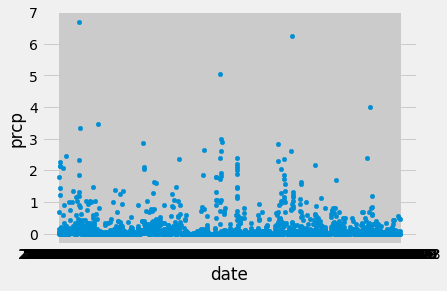

In [30]:
# Use Pandas Plotting with Matplotlib to plot the data
weather_df.plot.scatter("date", "prcp")

# rotate 90 degr and plot date vs precip

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
weather_df[["prcp"]].describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number [of] stations in the dataset

# Each station has:
#   elevation
#   latitude
#   station
#   longitude
#   name [name, altitude?, state, country]
#   id [1-9]
station_count = 0
station_list = session.query(Station)
for station in station_list:
    station_count += 1

print(f"There are {station_count} stations.")

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

In [ ]:
most_active_station = most_active_stations[0][0]
print(f"{most_active_station} is the most active station.")

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# func.max(), func.min(), func.avg()

session.query(func.max(Measurement.tobs),func.avg(Measurement.tobs),func.min(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_measurements = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).all() 
most_active_station_measurements

In [ ]:
type(most_active_station_measurements)

In [ ]:
most_active_station_df = pd.DataFrame(most_active_station_measurements, columns =['date', 'temperature'])
most_active_station_df.head()

In [ ]:
most_active_station_df = most_active_station_df.sort_values("date")
most_active_station_df.dtypes

In [ ]:
# plt.plot(most_active_station_df)
# most_active_station_df.plot()
most_active_station_most_recent_year = []
most_active_station_most_recent_year = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= query_start_date).\
most_active_station_most_recent_year = pd.DataFrame(results, columns=["tobs"])
most_active_station_most_recent_year.plot.hist(bins=12)
plt.xlabel("Temperature")

In [ ]:
most_active_station_most_recent_year.describe()

# Close session

In [ ]:
# Close Session
session.close()